========================================================
# Query Simbad on CALSPEC sources
========================================================

- author Sylvie Dagoret-Campagne
- Affiliation LAL-IN2P3-CNRS
- Work : LSST & StarDice
- date May 4th 2017

# Configuration with packages
---------------------------------------------

In [1]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
import os
import re

In [3]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [4]:
os.environ['PYSYN_CDBS']

'/Users/dagoret-campagnesylvie/MacOsX/External/PySyn_CDBS/grp/hst/cdbs'

In [5]:
import astropy
from astropy.io import fits
import pysynphot as S
S.primary_area=6*1e4
S.binning=10.

In [6]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle
from astropy.table import Table
from astropy.coordinates import Angle
from astropy.time import Time, TimezoneInfo

In [7]:
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)


In [8]:
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

In [9]:
from datetime import datetime
from pytz import timezone
import pytz

In [10]:
from pytz import all_timezones,common_timezones

In [13]:
from astroquery.simbad import Simbad

In [14]:
from astropy.coordinates import get_sun,get_moon

# Initialisation

## Simbad

In [15]:
Simbad.list_votable_fields()

--NOTES--

1. The parameter filtername must correspond to an existing filter. Filters include: B,V,R,I,J,K.  They are checked by SIMBAD but not astroquery.simbad

2. Fields beginning with rvz display the data as it is in the database. Fields beginning with rv force the display as a radial velocity. Fields beginning with z force the display as a redshift

3. For each measurement catalog, the VOTable contains all fields of the first measurement. When applicable, the first measurement is the mean one. 

Available VOTABLE fields:

          col0                   col1              col2     
------------------------ -------------------- --------------
      bibcodelist(y1-y2) fluxdata(filtername)       plx_qual
                     cel                 gcrv             pm
                    cl.g                  gen     pm_bibcode
                coo(opt)                   gj   pm_err_angle
             coo_bibcode                 hbet    pm_err_maja
           coo_err_angle                

In [16]:
Simbad.get_field_description ('flux(filtername)') 


value of the flux for the given filter


In [17]:
Simbad.get_votable_fields()

['main_id', 'coordinates']

In [18]:
customSimbad = Simbad()

In [19]:
customSimbad.add_votable_fields('flux(U)','flux(B)','flux(V)','flux(R)','flux(I)','flux(J)')

In [20]:
result_table = customSimbad.query_object('VEGA')   # Ask Simbad ALPHA_LYR

In [21]:
print result_table

 MAIN_ID        RA           DEC      RA_PREC ... FLUX_R FLUX_I    FLUX_J  
             "h:m:s"       "d:m:s"            ...  mag    mag       mag    
--------- ------------- ------------- ------- ... ------ ------ -----------
* alf Lyr 18 36 56.3363 +38 47 01.280       9 ...   0.07    0.1 -0.18000001


## Times zones

In [22]:
#common_timezones

## Observatory sites

In [23]:
#EarthLocation.get_site_names()

In [24]:
observationtime=datetime(2017, 6, 1)

### CTIO

- http://www.ctio.noao.edu/noao/
- http://ast.noao.edu/facilities/ctio

 	
- Coordinates :	30°10′10.78″S 70°48′23.49″ , WCoordinates: 30°10′10.78″S 70°48′23.49″W
- Altitude 	  : 2,207 metres 

#### CTIO time and Time zone and UTC Offset

In [25]:
CTIO_OBS_time=datetime(2017, 6, 1,0,0,0)

In [26]:
CTIO_TZ = timezone('America/Santiago')

In [27]:
td=CTIO_TZ.utcoffset(CTIO_OBS_time, is_dst=True)

In [28]:
timeshift_hours=td.days*24+td.seconds/3600.

In [29]:
CTIO_UTC_OFFSET=int(timeshift_hours)

In [30]:
print 'CTIO_UTC_OFFSET = ', CTIO_UTC_OFFSET

CTIO_UTC_OFFSET =  -4


#### CTIO Location

In [31]:
CTIO_OBS_loc=EarthLocation.of_site('Cerro Tololo Interamerican Observatory')

In [32]:
CTIO_OBS_loc.to_geodetic()

(<Longitude -70.815 deg>,
 <Latitude -30.165277777777778 deg>,
 <Quantity 2214.9999999993697 m>)

### My Work

In [33]:
WORK_OBS_time=datetime(2017, 5, 5,0,0,0) # Choose Today evening

In [34]:
WORK_TZ = timezone('Europe/Paris')

In [35]:
td=WORK_TZ.utcoffset(WORK_OBS_time, is_dst=True)

In [36]:
timeshift_hours=td.days*24+td.seconds/3600.

In [37]:
WORK_UTC_OFFSET=int(timeshift_hours)

In [38]:
print 'WORK_UTC_OFFSET',WORK_UTC_OFFSET

WORK_UTC_OFFSET 2


### My local time

In [39]:
WORK_OBS_loc=EarthLocation.of_address('Laboratoire de l accelerateur lineaire, Universite Paris Sud, Orsay, FRANCE,',get_height=True)
WORK_OBS_loc.to_geodetic()

(<Longitude 2.1709371 deg>,
 <Latitude 48.69931509999999 deg>,
 <Quantity 60.069522858033785 m>)

### OHP

- http://www.obs-hp.fr/info.shtml

- Longitude = 5° 42' 44" E 
- Latitude = +43° 55' 54"

#### Observation Time

In [40]:
OHP_OBS_time=datetime(2017, 6, 20,0,0,0)

In [41]:
OHP_TZ = timezone('Europe/Paris')

In [42]:
td=OHP_TZ.utcoffset(OHP_OBS_time, is_dst=True)

In [43]:
timeshift_hours=td.days*24+td.seconds/3600.

In [44]:
OHP_UTC_OFFSET=int(timeshift_hours)

In [45]:
print 'OHP_UTC_OFFSET = ', OHP_UTC_OFFSET

OHP_UTC_OFFSET =  2


#### Location

In [46]:
# Use Google to get earth location from adress
OHP_OBS_loc=EarthLocation.of_address('Observatoire de haute Provence, FRANCE',get_height=True)

In [47]:
OHP_OBS_loc.to_geodetic()

(<Longitude 5.71362 deg>,
 <Latitude 43.930415 deg>,
 <Quantity 639.0343627919294 m>)

### LSST

In [48]:
LSST_OBS_loc=EarthLocation.of_site('Cerro Pachon')

In [49]:
LSST_OBS_loc.to_geodetic()

(<Longitude -70.7366833333333 deg>,
 <Latitude -30.240741666666672 deg>,
 <Quantity 2749.999999999238 m>)

# Query Simbad:
https://astroquery.readthedocs.io/en/latest/simbad/simbad.html

In [50]:
from astroquery.simbad import Simbad

In [51]:
SEDfile_dir=os.path.join(os.environ['PYSYN_CDBS'], 'calspec')

In [52]:
filelist=os.listdir(SEDfile_dir) 

## Extract the fits file headers

In [53]:
star_header = []
for filename in filelist:
    index=0
    if re.search('fits',filename):  #example of filename filter
        index+=1
        fullfilename = os.path.join(os.environ['PYSYN_CDBS'], 'calspec',filename)
        hdr = fits.getheader(fullfilename)
        star_header.append(hdr)

    START STIS                                                                   [astropy.io.fits.card]
FILE WRITTEN BY ECHLREDUCE.PRO ON 11-Jun-2013 11:27:39.00                        [astropy.io.fits.card]
coadd list for E*H:                                                              [astropy.io.fits.card]
 o57u01030 obb001040 obb005010 obb005020 obb001010 obb001090 obb005030           [astropy.io.fits.card]
 obb005040 obb001060 obb001030 o57u01020 obb001050 obb001020 obb0010a0           [astropy.io.fits.card]
 obb001070 o6hb100f0 obb001080 o57u01040 o5i011010 o5i011020 o5i011030           [astropy.io.fits.card]
 obb0010b0 obb002090 obb0020b0 obb002010 obb002030 o6hb20060 obb002020           [astropy.io.fits.card]
 o6hb20070 obb002040 o6hb20080 obb002050 obb002060 o6hb20090 obb002070           [astropy.io.fits.card]
 obb002080 obb0020a0 obb0020c0 obb0020d0 obb004080 obb053040 obb053080           [astropy.io.fits.card]
 obb053010 obb053020 obb053030 obb053050 obb053060 obb0530a0 obb

In [54]:
star_header[1][7] # TARGETID

'10LAC'

## Extract the object name from the headers

In [55]:
star_names = []
index=0
for hdr in star_header:    
    star_name=star_header[index][7]
    star_names.append(star_name)
    index+=1

In [56]:
#star_names

In [57]:
class CalibSpecStarSmb:
    """
    Class for the CALSPEC stars from Simbad Query
    """
    name = ""          # the name of the star from CALSPEC/Pysynphot
    simbadname=""      # the name of the star returned by Astroquery-Simbad 
    RA =""             # string Right assension
    DEC=""             # string declination
    U=0                # magnitudes
    B=0
    V=0
    R=0
    I=0
    J=0

    def __init__(self, name,simbname,ra,dec,u,b,v,r,i,j):   # constructor
        self.name=name
        self.simbname=simbname
        self.RA=ra
        self.DEC=dec
        self.U=u
        self.B=b
        self.V=v
        self.R=r
        self.I=i
        self.J=j
    def show(self):                             # print 
        print 'name=',self.name,', ra=',self.RA,', dec=',self.DEC, ' V=',self.V,'mag'
    def getName(self):                          # getters
        return self.name
    def getRA(self):
        return self.RA
    def getDEC(self):
        return self.DEC  

In [58]:
class CalibSpecStarSkc:
    """
    Class for the CALSPEC stars from SkyCoord Query
    """
    name = ""          # the name of the star from CALSPEC/Pysynphot
    RA =0             # number Right ascension in deg
    DEC=0             # number declination

    skycoord=astropy.coordinates.SkyCoord.from_name("VEGA")  # creazy init with Vega

    def __init__(self, name,ra,dec):   # constructor
        self.name=name
        self.RA=ra
        self.DEC=dec
        self.skycoord=astropy.coordinates.SkyCoord.from_name(name)
        
    def show(self):                             # print 
        #print 'name=',self.name,', ra=',self.RA,', dec=',self.DEC
        print 'name',self.name,' :: ', self.skycoord
    def getName(self):                          # getters
        return self.name
    def getRA(self):
        return self.RA
    def getDEC(self):
        return self.DEC 
    def getSkyCoord(self):
        return self.skycoord

## Loop on entries to get info on coordinates on CALSPEC from Simbad

- This is a way to sort the good name for stars
- Moreover it does not crash if Simbad does not recognize a name

In [59]:
All_CALSPEC_Stars_InSimbad = {} #dictionnary of stars
count =0
for name in star_names: # loop on star names from Pysynphot-CALSPEC
    result_table = customSimbad.query_object(name)   # Ask Simbad
    if result_table != None:                   #check if Simbad has found the star
        count+=1
        print "---------------------",count,') ',name,'-------------------------'
        print result_table
        # create an object with the found star
        newstar=CalibSpecStarSmb(name,result_table["MAIN_ID"][0],result_table["RA"][0],result_table["DEC"][0],result_table["FLUX_U"][0],result_table["FLUX_B"][0],result_table["FLUX_V"][0],result_table["FLUX_R"][0],result_table["FLUX_I"][0],result_table["FLUX_J"][0])
        # fill the dictionnary only if there is no instance of that star already in dictionnary
        if not newstar.getName() in All_CALSPEC_Stars_InSimbad.keys():
            All_CALSPEC_Stars_InSimbad[newstar.getName()]= newstar # fill the directionary with the new star- object
            

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astropy/table/table.py:2517: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  result = (self.as_array().data == other) & (self.mask == false_mask)
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '1732526 with NICMOS observations': No known catalog could be found
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '1732526': No known catalog could be found
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packa

--------------------- 1 )  10LAC -------------------------
 MAIN_ID        RA           DEC      RA_PREC ... FLUX_R   FLUX_I    FLUX_J 
             "h:m:s"       "d:m:s"            ...  mag      mag       mag   
--------- ------------- ------------- ------- ... ------ --------- ---------
*  10 Lac 22 39 15.6786 +39 03 00.971       9 ...   4.98 5.1900001 5.3899999
--------------------- 2 )  10LAC -------------------------
 MAIN_ID        RA           DEC      RA_PREC ... FLUX_R   FLUX_I    FLUX_J 
             "h:m:s"       "d:m:s"            ...  mag      mag       mag   
--------- ------------- ------------- ------- ... ------ --------- ---------
*  10 Lac 22 39 15.6786 +39 03 00.971       9 ...   4.98 5.1900001 5.3899999
--------------------- 3 )  10LAC -------------------------
 MAIN_ID        RA           DEC      RA_PREC ... FLUX_R   FLUX_I    FLUX_J 
             "h:m:s"       "d:m:s"            ...  mag      mag       mag   
--------- ------------- ------------- ------- ... ---

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '1757132': No known catalog could be found
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '1802271 with NICMOS observations': No known catalog could be found
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '1802271': No known catalog could be found
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/l

--------------------- 4 )  ALPHA_LYR -------------------------
 MAIN_ID        RA           DEC      RA_PREC ... FLUX_R FLUX_I    FLUX_J  
             "h:m:s"       "d:m:s"            ...  mag    mag       mag    
--------- ------------- ------------- ------- ... ------ ------ -----------
* alf Lyr 18 36 56.3363 +38 47 01.280       9 ...   0.07    0.1 -0.18000001
--------------------- 5 )  ALPHA_LYR -------------------------
 MAIN_ID        RA           DEC      RA_PREC ... FLUX_R FLUX_I    FLUX_J  
             "h:m:s"       "d:m:s"            ...  mag    mag       mag    
--------- ------------- ------------- ------- ... ------ ------ -----------
* alf Lyr 18 36 56.3363 +38 47 01.280       9 ...   0.07    0.1 -0.18000001
--------------------- 6 )  ALPHA_LYR -------------------------
 MAIN_ID        RA           DEC      RA_PREC ... FLUX_R FLUX_I    FLUX_J  
             "h:m:s"       "d:m:s"            ...  mag    mag       mag    
--------- ------------- ------------- ------- ... -

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME BD02D3375
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME BD17D4708 with STIS observations
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): 'BD17D4708 with STIS & NICMOS observations': this identifier has an incorrect format for catalog: 	BD : Bon

--------------------- 7 )  FEIGE110 -------------------------
 MAIN_ID        RA           DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
             "h:m:s"       "d:m:s"            ...  mag    mag    mag    mag  
--------- ------------- ------------- ------- ... ------ ------ ------ ------
Feige 110 23 19 58.3981 -05 09 56.160       9 ...   11.5  11.97 12.145 12.548
--------------------- 8 )  FEIGE110 -------------------------
 MAIN_ID        RA           DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
             "h:m:s"       "d:m:s"            ...  mag    mag    mag    mag  
--------- ------------- ------------- ------- ... ------ ------ ------ ------
Feige 110 23 19 58.3981 -05 09 56.160       9 ...   11.5  11.97 12.145 12.548
--------------------- 9 )  FEIGE110 -------------------------
 MAIN_ID        RA           DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
             "h:m:s"       "d:m:s"            ...  mag    mag    mag    mag  
--------- ------------- ----------

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME FEIGE34 with STIS observations
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): 'g191b2b mod 004.fits': this identifier has an incorrect format for catalog: 	g : Giclas
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): 'Bohlin, R. C. 2009, in preparation': this identifier has an incorrect for

--------------------- 13 )  G191B2B -------------------------
  MAIN_ID         RA           DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
               "h:m:s"       "d:m:s"            ...  mag    mag    mag    mag  
----------- ------------- ------------- ------- ... ------ ------ ------ ------
BD+52   913 05 05 30.6128 +52 49 51.955       9 ...  11.69  11.93 12.108 12.543
--------------------- 14 )  G191B2B -------------------------
  MAIN_ID         RA           DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
               "h:m:s"       "d:m:s"            ...  mag    mag    mag    mag  
----------- ------------- ------------- ------- ... ------ ------ ------ ------
BD+52   913 05 05 30.6128 +52 49 51.955       9 ...  11.69  11.93 12.108 12.543
--------------------- 15 )  G191B2B -------------------------
  MAIN_ID         RA           DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
               "h:m:s"       "d:m:s"            ...  mag    mag    mag    mag  
----------- --

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME GD153 with STIS observations
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): 'GD153 with STIS & NICMOS observations': this identifier has an incorrect format for catalog: 	GD : Giclas, Dwarf
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): 'gd71 mod 005.fits': this identifier has an incorre

--------------------- 16 )  GD153 -------------------------
MAIN_ID      RA          DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
          "h:m:s"      "d:m:s"            ...  mag    mag    mag    mag  
------- ------------ ------------ ------- ... ------ ------ ------ ------
 GD 153 12 57 02.337 +22 01 52.68       7 ... 13.349 13.488 13.669 14.012
--------------------- 17 )  GD153 -------------------------
MAIN_ID      RA          DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
          "h:m:s"      "d:m:s"            ...  mag    mag    mag    mag  
------- ------------ ------------ ------- ... ------ ------ ------ ------
 GD 153 12 57 02.337 +22 01 52.68       7 ... 13.349 13.488 13.669 14.012
--------------------- 18 )  GD153 -------------------------
MAIN_ID      RA          DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
          "h:m:s"      "d:m:s"            ...  mag    mag    mag    mag  
------- ------------ ------------ ------- ... ------ ------ ------ ------
 GD 15

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME GD71 with STIS observations
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): 'GD71 with STIS & NICMOS observations': this identifier has an incorrect format for catalog: 	GD : Giclas, Dwarf
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : GJ  7541 A
  (

--------------------- 19 )  GD71 -------------------------
MAIN_ID      RA          DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
          "h:m:s"      "d:m:s"            ...  mag    mag    mag    mag  
------- ------------ ------------ ------- ... ------ ------ ------ ------
  GD 71 05 52 27.614 +15 53 13.75       7 ... 13.032 13.169 13.337 13.728
--------------------- 20 )  GD71 -------------------------
MAIN_ID      RA          DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
          "h:m:s"      "d:m:s"            ...  mag    mag    mag    mag  
------- ------------ ------------ ------- ... ------ ------ ------ ------
  GD 71 05 52 27.614 +15 53 13.75       7 ... 13.032 13.169 13.337 13.728
--------------------- 21 )  GD71 -------------------------
MAIN_ID      RA          DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
          "h:m:s"      "d:m:s"            ...  mag    mag    mag    mag  
------- ------------ ------------ ------- ... ------ ------ ------ ------
  GD 71 0

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME HD165459 with NICMOS observations
  (error.line, error.msg))


--------------------- 60 )  HD180609 -------------------------
 MAIN_ID        RA           DEC      RA_PREC ... FLUX_R FLUX_I   FLUX_J 
             "h:m:s"       "d:m:s"            ...  mag    mag      mag   
--------- ------------- ------------- ------- ... ------ ------ ---------
HD 180609 19 12 47.1992 +64 10 37.179       9 ...     --     -- 9.1660004
--------------------- 61 )  HD185975 -------------------------
 MAIN_ID        RA           DEC      RA_PREC ... FLUX_R FLUX_I   FLUX_J 
             "h:m:s"       "d:m:s"            ...  mag    mag      mag   
--------- ------------- ------------- ------- ... ------ ------ ---------
HD 185975 20 28 18.7284 -87 28 19.941       9 ...     --     -- 6.8629999
--------------------- 62 )  HD185975 -------------------------
 MAIN_ID        RA           DEC      RA_PREC ... FLUX_R FLUX_I   FLUX_J 
             "h:m:s"       "d:m:s"            ...  mag    mag      mag   
--------- ------------- ------------- ------- ... ------ ------ -------

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): 'HD209458 with STIS & NICMOS observations': this identifier has an incorrect format for catalog: 	HD : Henry Draper
  (error.line, error.msg))


--------------------- 78 )  HD37962 -------------------------
 MAIN_ID        RA           DEC      RA_PREC ... FLUX_R FLUX_I   FLUX_J 
             "h:m:s"       "d:m:s"            ...  mag    mag      mag   
--------- ------------- ------------- ------- ... ------ ------ ---------
HD  37962 05 40 51.9668 -31 21 03.987       9 ...     --     -- 6.6750002
--------------------- 79 )  HD38949 -------------------------
 MAIN_ID        RA           DEC      RA_PREC ... FLUX_R FLUX_I   FLUX_J 
             "h:m:s"       "d:m:s"            ...  mag    mag      mag   
--------- ------------- ------------- ------- ... ------ ------ ---------
HD  38949 05 48 20.0586 -24 27 49.861       9 ...     --     -- 6.7480001
--------------------- 80 )  HD38949 -------------------------
 MAIN_ID        RA           DEC      RA_PREC ... FLUX_R FLUX_I   FLUX_J 
             "h:m:s"       "d:m:s"            ...  mag    mag      mag   
--------- ------------- ------------- ------- ... ------ ------ ---------


/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME HD93521 with STIS observations
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME HS2027 with STIS observations
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME HS2027
  (error.line, error.msg))
/Users/dago

--------------------- 85 )  HD93521 -------------------------
 MAIN_ID        RA           DEC      RA_PREC ... FLUX_R FLUX_I   FLUX_J 
             "h:m:s"       "d:m:s"            ...  mag    mag      mag   
--------- ------------- ------------- ------- ... ------ ------ ---------
HD  93521 10 48 23.5113 +37 34 13.092       9 ...     --     -- 7.4990001
--------------------- 86 )  HD93521 -------------------------
 MAIN_ID        RA           DEC      RA_PREC ... FLUX_R FLUX_I   FLUX_J 
             "h:m:s"       "d:m:s"            ...  mag    mag      mag   
--------- ------------- ------------- ------- ... ------ ------ ---------
HD  93521 10 48 23.5113 +37 34 13.092       9 ...     --     -- 7.4990001
--------------------- 87 )  HD93521 -------------------------
 MAIN_ID        RA           DEC      RA_PREC ... FLUX_R FLUX_I   FLUX_J 
             "h:m:s"       "d:m:s"            ...  mag    mag      mag   
--------- ------------- ------------- ------- ... ------ ------ ---------


/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): 'hz43 mod 004.fits': this identifier has an incorrect format for catalog: 	hz : Humason-Zwicky
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME HZ43 with STIS observations
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME HZ43B with STIS observation

--------------------- 92 )  HZ43 -------------------------
MAIN_ID       RA           DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
           "h:m:s"       "d:m:s"            ...  mag    mag    mag    mag  
------- ------------- ------------- ------- ... ------ ------ ------ ------
  HZ 43 13 16 21.8532 +29 05 55.379       9 ...  12.66     --     -- 10.373
--------------------- 93 )  HZ43 -------------------------
MAIN_ID       RA           DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
           "h:m:s"       "d:m:s"            ...  mag    mag    mag    mag  
------- ------------- ------------- ------- ... ------ ------ ------ ------
  HZ 43 13 16 21.8532 +29 05 55.379       9 ...  12.66     --     -- 10.373
--------------------- 94 )  HZ43B -------------------------
MAIN_ID      RA          DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
          "h:m:s"      "d:m:s"            ...  mag    mag    mag    mag  
------- ------------ ------------ ------- ... ------ ------ ------

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME HZ44 with STIS observations
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME HZ4 with STIS observations
  (error.line, error.msg))


--------------------- 97 )  HZ44 -------------------------
MAIN_ID      RA          DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
          "h:m:s"      "d:m:s"            ...  mag    mag    mag    mag  
------- ------------ ------------ ------- ... ------ ------ ------ ------
  HZ 44 13 23 35.264 +36 07 59.54       7 ...  11.65   12.0 11.995 12.386
--------------------- 98 )  HZ44 -------------------------
MAIN_ID      RA          DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
          "h:m:s"      "d:m:s"            ...  mag    mag    mag    mag  
------- ------------ ------------ ------- ... ------ ------ ------ ------
  HZ 44 13 23 35.264 +36 07 59.54       7 ...  11.65   12.0 11.995 12.386
--------------------- 99 )  HZ44 -------------------------
MAIN_ID      RA          DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
          "h:m:s"      "d:m:s"            ...  mag    mag    mag    mag  
------- ------------ ------------ ------- ... ------ ------ ------ ------
  HZ 44 1

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME KF01T5 with NICMOS observations
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME KF01T5
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME KF06T1 with NICMOS observations
  (error.line, error.msg))
/Users/d

--------------------- 103 )  LDS749B -------------------------
MAIN_ID      RA         DEC     RA_PREC DEC_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
          "h:m:s"     "d:m:s"                    ...  mag    mag    mag    mag  
------- ----------- ----------- ------- -------- ... ------ ------ ------ ------
LAWD 87 21 32 16.24 +00 15 14.4       6        6 ... 14.674 14.675 14.676 14.894
--------------------- 104 )  LDS749B -------------------------
MAIN_ID      RA         DEC     RA_PREC DEC_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
          "h:m:s"     "d:m:s"                    ...  mag    mag    mag    mag  
------- ----------- ----------- ------- -------- ... ------ ------ ------ ------
LAWD 87 21 32 16.24 +00 15 14.4       6        6 ... 14.674 14.675 14.676 14.894
--------------------- 105 )  LDS749B -------------------------
MAIN_ID      RA         DEC     RA_PREC DEC_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
          "h:m:s"     "d:m:s"                    ...  mag    mag    mag    mag  
-

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): 'P041C with STIS & NICMOS observations': No known catalog could be found
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME P 041C
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME P177D with STIS observations
  (error.line, error.msg))
/Users/dagoret

--------------------- 106 )  SIRIUS -------------------------
 MAIN_ID        RA           DEC      RA_PREC ... FLUX_R   FLUX_I   FLUX_J
             "h:m:s"       "d:m:s"            ...  mag      mag      mag  
--------- ------------- ------------- ------- ... ------ ---------- ------
* alf CMa 06 45 08.9172 -16 42 58.017       9 ...  -1.46 -1.4299999  -1.36
--------------------- 107 )  SIRIUS -------------------------
 MAIN_ID        RA           DEC      RA_PREC ... FLUX_R   FLUX_I   FLUX_J
             "h:m:s"       "d:m:s"            ...  mag      mag      mag  
--------- ------------- ------------- ------- ... ------ ---------- ------
* alf CMa 06 45 08.9172 -16 42 58.017       9 ...  -1.46 -1.4299999  -1.36


/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME SNAP-1
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): 'SNAP-2 with STIS & NICMOS observations': No known catalog could be found
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME SNAP-2
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaco

--------------------- 108 )  VB8 -------------------------
 MAIN_ID        RA          DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
             "h:m:s"      "d:m:s"            ...  mag    mag    mag    mag  
---------- ------------ ------------ ------- ... ------ ------ ------ ------
GJ   644 C 16 55 35.293 -08 23 40.11       7 ... 16.916 14.566  12.24  9.776
--------------------- 109 )  VB8 -------------------------
 MAIN_ID        RA          DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
             "h:m:s"      "d:m:s"            ...  mag    mag    mag    mag  
---------- ------------ ------------ ------- ... ------ ------ ------ ------
GJ   644 C 16 55 35.293 -08 23 40.11       7 ... 16.916 14.566  12.24  9.776
--------------------- 110 )  VB8 -------------------------
 MAIN_ID        RA          DEC      RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
             "h:m:s"      "d:m:s"            ...  mag    mag    mag    mag  
---------- ------------ ------------ ------- ... ----

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME Koester He Model
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME Standard star flux with STIS observations--------------------------
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME WD0320-539 with STIS 

--------------------- 114 )  WD0320-539 -------------------------
MAIN_ID       RA         DEC     RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
           "h:m:s"     "d:m:s"           ...  mag    mag    mag    mag  
-------- ----------- ----------- ------- ... ------ ------ ------ ------
LB  1663 03 22 14.83 -53 45 16.5       6 ...   14.9  15.51  15.21  15.61
--------------------- 115 )  WD0320-539 -------------------------
MAIN_ID       RA         DEC     RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
           "h:m:s"     "d:m:s"           ...  mag    mag    mag    mag  
-------- ----------- ----------- ------- ... ------ ------ ------ ------
LB  1663 03 22 14.83 -53 45 16.5       6 ...   14.9  15.51  15.21  15.61
--------------------- 116 )  WD0320-539 -------------------------
MAIN_ID       RA         DEC     RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
           "h:m:s"     "d:m:s"           ...  mag    mag    mag    mag  
-------- ----------- ----------- ------- ... ------ ------ ------ ------

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME WD0947 857 with STIS observations
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME WD0947 857
  (error.line, error.msg))
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME WD1026 453 with STIS observations
  (error.line, error.msg))


--------------------- 117 )  WD1057+719 -------------------------
  MAIN_ID        RA         DEC     RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
              "h:m:s"     "d:m:s"           ...  mag    mag    mag    mag  
----------- ----------- ----------- ------- ... ------ ------ ------ ------
PG 1057+719 11 00 34.24 +71 38 02.9       6 ...  14.68  15.23     -- 15.472
--------------------- 118 )  WD1057+719 -------------------------
  MAIN_ID        RA         DEC     RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
              "h:m:s"     "d:m:s"           ...  mag    mag    mag    mag  
----------- ----------- ----------- ------- ... ------ ------ ------ ------
PG 1057+719 11 00 34.24 +71 38 02.9       6 ...  14.68  15.23     -- 15.472
--------------------- 119 )  WD1057+719 -------------------------
  MAIN_ID        RA         DEC     RA_PREC ... FLUX_V FLUX_R FLUX_I FLUX_J
              "h:m:s"     "d:m:s"           ...  mag    mag    mag    mag  
----------- ----------- ----------- ------

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): 'WDcovar.fits': this identifier has an incorrect format for catalogs: 	WD (
  (error.line, error.msg))


In [60]:
print " Number of CALSPEC stars recognised by Simbad : ",len(All_CALSPEC_Stars_InSimbad)

 Number of CALSPEC stars recognised by Simbad :  41


### shows list of CALSPEC stars from SimBad

In [61]:
print All_CALSPEC_Stars_InSimbad.keys()

['10LAC', 'HD205905', 'HD14943', 'HD37725', 'HD160617', 'FEIGE34', 'HD159222', 'HZ43', 'HZ44', 'HZ21', 'WD1057+719', 'HZ4', 'FEIGE110', 'HD031128', 'GD71', 'HD209458', 'SIRIUS', 'WD0320-539', 'HD111980', 'HD009051', 'HD60753', 'LDS749B', 'HD180609', 'HD158485', 'HD37962', 'HD163466', 'HD185975', 'G191B2B', 'HD116405', 'ALPHA_LYR', 'HD200654', 'HZ43B', 'WD1657+343', 'HD165459', 'HD93521', 'GD153', 'WD0308-565', 'HD38949', 'VB8', 'HD106252', 'HD074000']


## From SkyCoord, also get the coordinates of the star

In [62]:
All_CALSPEC_Stars_InSkyCoord = {} #dictionnary of stars
for starnam in All_CALSPEC_Stars_InSimbad.keys():
    starloc=astropy.coordinates.SkyCoord.from_name(starnam)
    newstar=CalibSpecStarSkc(starnam,starloc.ra.deg,starloc.dec.deg)
    All_CALSPEC_Stars_InSkyCoord [starnam] = newstar

In [63]:
print " Number of CALSPEC stars recognised by SkyCoord : ",len(All_CALSPEC_Stars_InSkyCoord)

 Number of CALSPEC stars recognised by SkyCoord :  41


In [64]:
print All_CALSPEC_Stars_InSkyCoord.keys()

['10LAC', 'HD205905', 'WD0320-539', 'HD37725', 'HD160617', 'FEIGE34', 'HD159222', 'HZ43', 'HZ44', 'HZ21', 'WD1057+719', 'HZ4', 'FEIGE110', 'HD031128', 'GD71', 'HD209458', 'SIRIUS', 'ALPHA_LYR', 'HD111980', 'HD009051', 'HD60753', 'LDS749B', 'HD180609', 'HD158485', 'HD37962', 'HD163466', 'HD185975', 'G191B2B', 'HD116405', 'HD14943', 'HD200654', 'HZ43B', 'WD1657+343', 'HD165459', 'HD93521', 'GD153', 'WD0308-565', 'HD38949', 'VB8', 'HD106252', 'HD074000']


In [65]:
for key, starobj in All_CALSPEC_Stars_InSkyCoord.iteritems():
    print starobj.show()

name 10LAC  ::  <SkyCoord (ICRS): (ra, dec) in deg
    ( 339.81532766,  39.05026977)>
None
name HD205905  ::  <SkyCoord (ICRS): (ra, dec) in deg
    ( 324.79229796, -27.30657448)>
None
name WD0320-539  ::  <SkyCoord (ICRS): (ra, dec) in deg
    ( 50.561792, -53.754583)>
None
name HD37725  ::  <SkyCoord (ICRS): (ra, dec) in deg
    ( 85.47654458,  29.29747917)>
None
name HD160617  ::  <SkyCoord (ICRS): (ra, dec) in deg
    ( 265.70551677, -40.32097928)>
None
name FEIGE34  ::  <SkyCoord (ICRS): (ra, dec) in deg
    ( 159.90308495,  43.10257086)>
None
name HD159222  ::  <SkyCoord (ICRS): (ra, dec) in deg
    ( 263.00413544,  34.27114733)>
None
name HZ43  ::  <SkyCoord (ICRS): (ra, dec) in deg
    ( 199.0910417,  29.0987222)>
None
name HZ44  ::  <SkyCoord (ICRS): (ra, dec) in deg
    ( 200.8969333,  36.1332056)>
None
name HZ21  ::  <SkyCoord (ICRS): (ra, dec) in deg
    ( 183.484295,  32.9420947)>
None
name WD1057+719  ::  <SkyCoord (ICRS): (ra, dec) in deg
    ( 165.1447937,  71.6344664)>

# Observation Definition


- We must adapt the observation site and date here

In [66]:
obs_site=CTIO_OBS_loc
obs_date_time=Time(CTIO_OBS_time)
obs_utc_offset=CTIO_UTC_OFFSET

In [67]:
#obs_site=WORK_OBS_loc
#obs_date_time=Time(WORK_OBS_time)
#obs_utc_offset=WORK_UTC_OFFSET

In [68]:
print "*********************************************************************** "
print "* \t obs site    :: ", obs_site.to_geodetic()
print "* \t obs time    :: ", obs_date_time
print "* \t obs UTC off :: ", obs_utc_offset
print "*********************************************************************** "


*********************************************************************** 
* 	 obs site    ::  (<Longitude -70.815 deg>, <Latitude -30.165277777777778 deg>, <Quantity 2214.9999999993697 m>)
* 	 obs time    ::  2017-06-01 00:00:00
* 	 obs UTC off ::  -4
*********************************************************************** 


# Show Star Elevation in Sky

In [69]:
utcoffset=obs_utc_offset*u.hour
midnight = obs_date_time - utcoffset
delta_midnight = np.linspace(-12, 12, 1000)*u.hour

In [70]:
all_times_ofthenight = midnight + delta_midnight
frame_all_times_offthenight = AltAz(obstime=all_times_ofthenight, location=obs_site)
sunaltazs_ofthenight = get_sun(all_times_ofthenight).transform_to(frame_all_times_offthenight)
moonaltazs_ofthenight = get_moon(all_times_ofthenight).transform_to(frame_all_times_offthenight)

star ::  HD160617 alt= 79d50m22.7699s azim =  [u'179d40m29.84s'] delta_time= 1.78978978979 h
star ::  HD111980 alt= 78d27m05.1846s azim =  [u'359d24m25.1397s'] delta_time= -3.01501501502 h
star ::  VB8 alt= 68d15m14.1189s azim =  [u'0d19m33.8404s'] delta_time= 0.996996996997 h
star ::  HD106252 alt= 49d53m19.3523s azim =  [u'0d03m50.9846s'] delta_time= -3.68768768769 h


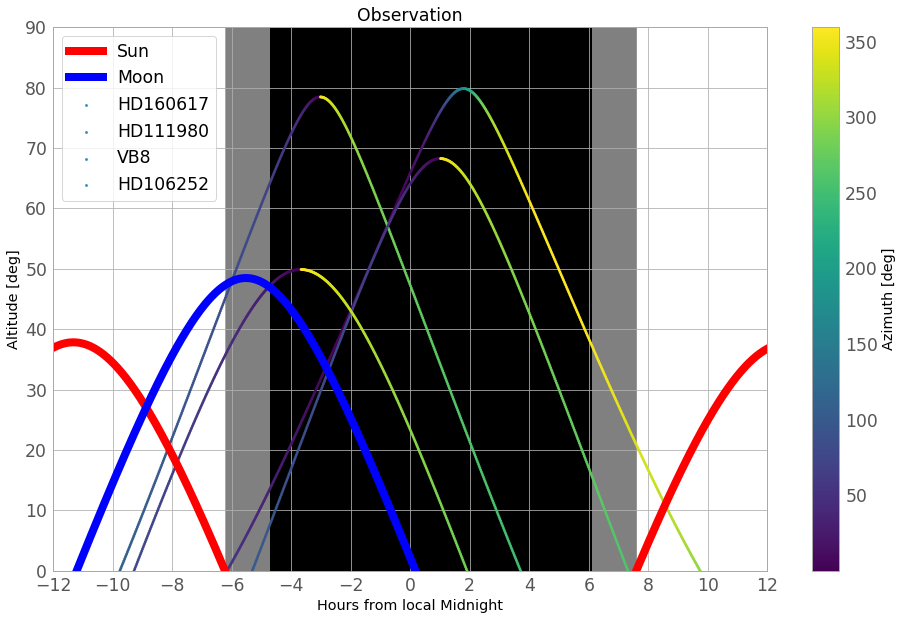

In [71]:
plt.figure(figsize=(16.,10.))
plt.plot(delta_midnight, sunaltazs_ofthenight.alt, color='r',lw=8, label='Sun')
plt.plot(delta_midnight, moonaltazs_ofthenight.alt, color='b',lw=8, label='Moon')

for key, starobj in All_CALSPEC_Stars_InSkyCoord.iteritems():
    star_traj_insky=starobj.getSkyCoord().transform_to(frame_all_times_offthenight)
    alt_max=np.max(star_traj_insky.alt)
    az_max=star_traj_insky.az[np.where(star_traj_insky.alt==alt_max)]
    delta_tt=delta_midnight[np.where(star_traj_insky.alt==alt_max)][0]
    if alt_max>45*u.deg and delta_tt<4*u.hour and delta_tt>-4*u.hour:
        print 'star :: ',key,'alt=',alt_max,'azim = ',az_max,'delta_time=',delta_tt
        plt.scatter(delta_midnight, star_traj_insky.alt,c=star_traj_insky.az, label=key, lw=0, s=8,cmap='viridis')
    
    
# plot astronomical crepuscule
plt.fill_between(delta_midnight.to('hr').value, 0, 90,
                 sunaltazs_ofthenight.alt < -0*u.deg, color='0.5', zorder=0)
#plot astronomical night
plt.fill_between(delta_midnight.to('hr').value, 0, 90,
                 sunaltazs_ofthenight.alt < -18*u.deg, color='k', zorder=0)
plt.colorbar().set_label('Azimuth [deg]')
plt.legend(loc='upper left')
plt.xlim(-12, 12)
plt.xticks(np.arange(13)*2 -12)
plt.ylim(0, 90)
plt.title('Observation')
plt.xlabel('Hours from local Midnight')
plt.ylabel('Altitude [deg]')
plt.show()